In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
#Lendo os dados com pandas 
dados = pd.read_csv("winequality-red.csv")

#exibindo os cinco primeiros do dataset
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# criando uma matriz X com os valores do data frame
X = dados.iloc[:,0:-1].values # exceto a coluna dos IDs e da classe
X.shape

(1599, 11)

In [4]:
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
X_df = pd.DataFrame(X,columns=features)
X_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
# subtraindo a média da respectiva coluna de X
X_mean = X - np.mean(X, axis=0)

In [6]:
#Step-2
features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
cov = np.cov(X_mean, rowvar = False)
cov_df = pd.DataFrame(cov,columns=features)
cov_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421
1,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600
2,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815
3,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219
4,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092
5,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698
6,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298
7,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998
8,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832
9,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907


In [7]:
corr = np.corrcoef(X_mean, rowvar = False)
corr_df = pd.DataFrame(corr,columns=features)
corr_df.index = features
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


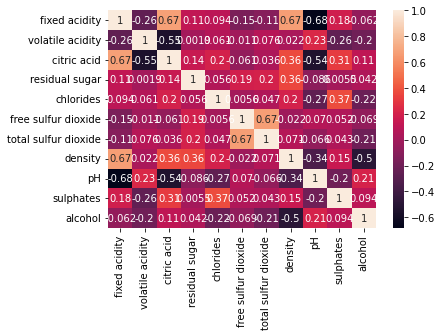

In [8]:
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
#Step-3
autovalores, autovetores = np.linalg.eigh(cov)

In [10]:
#Step-4
sorted_index = np.argsort(autovalores)[::-1]
sorted_autovalores = autovalores[sorted_index]
sorted_autovetores = autovetores[:,sorted_index]

In [11]:
# calculando a variância explicada e a variância explicada cumulativa
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(
        autovalores, reverse=True
    )
]
cum_var_exp = np.cumsum(var_exp)

In [12]:
# visualizando as informações
print('PCA')
x = [
    'PC %s' %i for i in range(
        1,len(autovalores)+1
    )
]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)

PCA
    auto-valores  cum_var_exp       var_exp Componente
0   5.614827e-07    94.657698  9.465770e+01       PC 1
1   1.454998e-03    99.494528  4.836830e+00       PC 2
2   1.007798e-02    99.753445  2.589172e-01       PC 3
3   1.134647e-02    99.905342  1.518968e-01       PC 4
4   2.319266e-02    99.992697  8.735540e-02       PC 5
5   4.139673e-02    99.996154  3.456072e-03       PC 6
6   1.046340e+00    99.998090  1.936276e-03       PC 7
7   1.819415e+00    99.999037  9.472781e-04       PC 8
8   3.101302e+00    99.999878  8.413766e-04       PC 9
9   5.793541e+01   100.000000  1.214728e-04      PC 10
10  1.133807e+03   100.000000  4.687628e-08      PC 11


In [13]:
num_components=2
A = sorted_autovetores[:,0:num_components]
X_reduced = np.dot(A.transpose() , X_mean.transpose() ).transpose()

In [14]:
df = pd.DataFrame(X_reduced, columns=['PC 1', 'PC 2'])
df['quality'] = dados['quality']

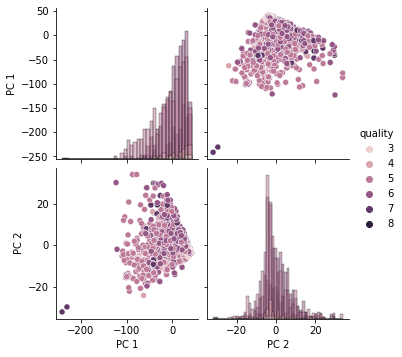

In [15]:
#Projetando com o PCA manual
sns.pairplot(
    df, vars=['PC 1', 'PC 2'], hue='quality', diag_kind="hist"
)
plt.show()

In [16]:
#Com aplicação do PCA usando a lib
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dados = pca.fit_transform(X_mean)

In [17]:
df_pca = pd.DataFrame(pca_dados, columns=['PC 1', 'PC 2'])
df_pca['quality'] = dados['quality']

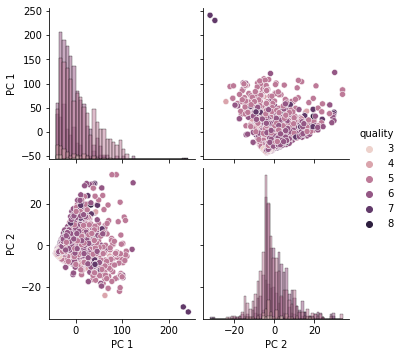

In [18]:
#Projetando com a biblioteca do PCA
sns.pairplot(
    df_pca, vars=['PC 1', 'PC 2'], hue='quality', diag_kind="hist"
)
plt.show()

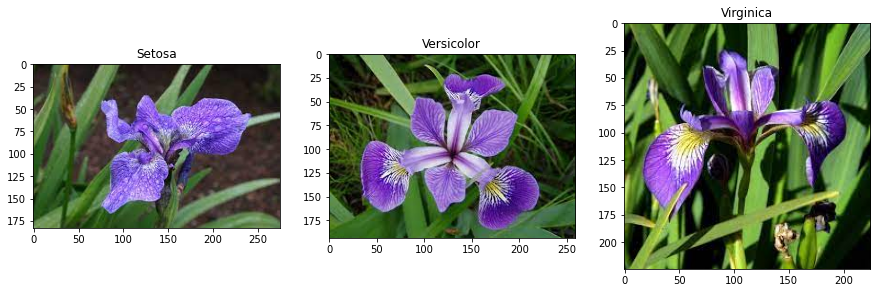

In [20]:
import cv2

setosa = cv2.cvtColor(cv2.imread('setosa.jpg'), cv2.COLOR_BGR2RGB)
versicolor = cv2.cvtColor(cv2.imread('versicolor.jpg'), cv2.COLOR_BGR2RGB)
virginica = cv2.cvtColor(cv2.imread('virginica.jpg'), cv2.COLOR_BGR2RGB)

# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (virginica)
plt.show ()

In [21]:
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)

(183, 275, 3)
(194, 259, 3)
(225, 225, 3)


In [22]:
# Convertendo do channel 3(rgb) para 1 channel(gray)
gray_setosa = cv2.cvtColor(setosa, cv2.COLOR_BGR2GRAY)
gray_versicolor = cv2.cvtColor(versicolor, cv2.COLOR_BGR2GRAY)
gray_virginica = cv2.cvtColor(virginica, cv2.COLOR_BGR2GRAY)
                              
print(gray_setosa.shape)
print(gray_versicolor.shape)
print(gray_virginica.shape)

(183, 275)
(194, 259)
(225, 225)


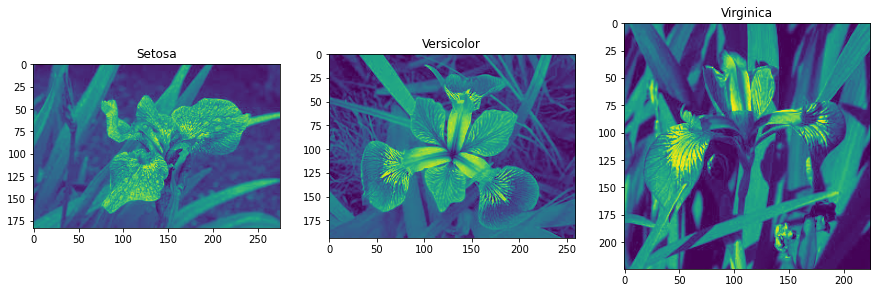

In [23]:
# Plotando as imagens 
fig = plt.figure (figsize = (15, 7.2)) 
fig.add_subplot (131) 
plt.title ("Setosa") 
plt.imshow (gray_setosa)
fig.add_subplot (132) 
plt.title ("Versicolor") 
plt.imshow (gray_versicolor)
fig.add_subplot (133) 
plt.title ("Virginica") 
plt.imshow (gray_virginica)
plt.show ()

In [24]:
# subtraindo a média da respectiva coluna de setosa, versicolor e virginica
X_mean_setosa = gray_setosa - np.mean(gray_setosa, axis=0)
X_mean_versicolor = gray_versicolor - np.mean(gray_versicolor, axis=0)
X_mean_virginica = gray_virginica - np.mean(gray_virginica, axis=0)

In [25]:
# Calcular a matriz de covariancia da iris setosa, versicolor e virginica
cov_setosa = np.cov(X_mean_setosa, rowvar=False)
cov_versicolor = np.cov(X_mean_versicolor, rowvar=False)
cov_virginica = np.cov(X_mean_virginica, rowvar=False)

In [26]:
# Determine os autovalores e autovetores setosa
from numpy.linalg import eigh
autovalores_setosa, autovetores_setosa = eigh(cov_setosa)
autovalores_versicolor, autovetores_versicolor = eigh(cov_versicolor)
autovalores_virginica, autovetores_virginica = eigh(cov_virginica)

In [27]:
#Ordenando em ordem decrescente os autovalores e autovetores da setosa, versicolor e virginica
sorted_index_setosa = np.argsort(autovalores_setosa)[::-1]
sorted_autovalores_setosa = autovalores_setosa[sorted_index_setosa]
sorted_autovetores_setosa = autovetores_setosa[:,sorted_index_setosa]

sorted_index_versicolor = np.argsort(autovalores_versicolor)[::-1]
sorted_autovalores_versicolor = autovalores_versicolor[sorted_index_versicolor]
sorted_autovetores_versicolor = autovetores_versicolor[:,sorted_index_versicolor]

sorted_index_virginica = np.argsort(autovalores_virginica)[::-1]
sorted_autovalores_virginica = autovalores_virginica[sorted_index_virginica]
sorted_autovetores_virginica = autovetores_virginica[:,sorted_index_virginica]

In [28]:
# Determine a variancia explicada setosa, versicolor e virginica
total_autovalores_setosa = sum(autovalores_setosa)
var_exp_setosa = [(i/total_autovalores_setosa) for i in sorted(autovalores_setosa, reverse=True)]
cum_var_exp_setosa = np.cumsum(var_exp_setosa)

total_autovalores_versicolor = sum(autovalores_versicolor)
var_exp_versicolor = [(i/total_autovalores_versicolor) for i in sorted(autovalores_versicolor, reverse=True)]
cum_var_exp_versicolor = np.cumsum(var_exp_versicolor)

total_autovalores_virginica = sum(autovalores_virginica)
var_exp_virginica = [(i/total_autovalores_virginica) for i in sorted(autovalores_virginica, reverse=True)]
cum_var_exp_virginica = np.cumsum(var_exp_virginica)

In [29]:
# visualizando as informações setosa
x_setosa = ['PC %s' %i for i in range(1,len(autovalores_setosa)+1)]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores_setosa,
     'cum_var_exp':cum_var_exp_setosa,
     'var_exp':var_exp_setosa,
     'Componente':x_setosa}
)
print(df_temp.head(50))

    auto-valores  cum_var_exp   var_exp Componente
0  -1.507487e-11     0.334111  0.334111       PC 1
1  -9.815571e-12     0.490067  0.155956       PC 2
2  -9.423969e-12     0.604467  0.114400       PC 3
3  -8.294175e-12     0.657949  0.053482       PC 4
4  -6.110657e-12     0.707100  0.049151       PC 5
5  -5.556892e-12     0.740262  0.033162       PC 6
6  -5.249323e-12     0.769278  0.029016       PC 7
7  -5.054908e-12     0.792004  0.022726       PC 8
8  -4.941933e-12     0.811286  0.019282       PC 9
9  -4.778709e-12     0.826438  0.015151      PC 10
10 -4.589015e-12     0.840492  0.014054      PC 11
11 -4.202167e-12     0.852967  0.012475      PC 12
12 -4.115239e-12     0.863135  0.010168      PC 13
13 -4.109026e-12     0.872925  0.009790      PC 14
14 -3.872898e-12     0.880770  0.007845      PC 15
15 -3.416600e-12     0.888346  0.007576      PC 16
16 -3.303002e-12     0.894707  0.006361      PC 17
17 -3.297043e-12     0.900406  0.005699      PC 18
18 -3.206634e-12     0.905573  

In [30]:
# visualizando as informações versicolor
x_versicolor = ['PC %s' %i for i in range(1,len(autovalores_versicolor)+1)]
df_temp_versicolor = pd.DataFrame(
    {'auto-valores': autovalores_versicolor,
     'cum_var_exp':cum_var_exp_versicolor,
     'var_exp':var_exp_versicolor,
     'Componente':x_versicolor}
)
print(df_temp_versicolor.head(50))

    auto-valores  cum_var_exp   var_exp Componente
0  -5.413455e-12     0.301455  0.301455       PC 1
1  -4.809012e-12     0.408645  0.107189       PC 2
2  -4.699605e-12     0.502350  0.093705       PC 3
3  -4.421421e-12     0.567273  0.064924       PC 4
4  -4.197415e-12     0.618157  0.050883       PC 5
5  -3.819349e-12     0.652484  0.034327       PC 6
6  -3.612616e-12     0.676792  0.024308       PC 7
7  -3.325759e-12     0.700419  0.023627       PC 8
8  -2.847691e-12     0.722010  0.021591       PC 9
9  -2.828879e-12     0.738761  0.016751      PC 10
10 -2.747765e-12     0.753831  0.015070      PC 11
11 -2.608775e-12     0.766527  0.012696      PC 12
12 -2.374791e-12     0.778576  0.012049      PC 13
13 -2.195482e-12     0.789267  0.010691      PC 14
14 -2.181156e-12     0.798905  0.009639      PC 15
15 -1.903000e-12     0.808201  0.009296      PC 16
16 -1.787653e-12     0.817180  0.008979      PC 17
17 -1.695295e-12     0.825289  0.008109      PC 18
18 -1.654750e-12     0.832968  

In [31]:
# visualizando as informações virginica
x_virginica = ['PC %s' %i for i in range(1,len(autovalores_virginica)+1)]
df_temp_virginica = pd.DataFrame(
    {'auto-valores': autovalores_virginica,
     'cum_var_exp':cum_var_exp_virginica,
     'var_exp':var_exp_virginica,
     'Componente':x_virginica}
)
print(df_temp_virginica.head(50))

    auto-valores  cum_var_exp   var_exp Componente
0   4.755692e-12     0.234617  0.234617       PC 1
1   1.605408e-04     0.413055  0.178438       PC 2
2   1.302172e-03     0.484912  0.071857       PC 3
3   1.962951e-03     0.553017  0.068105       PC 4
4   4.096214e-03     0.617021  0.064004       PC 5
5   5.083762e-03     0.666060  0.049039       PC 6
6   6.843803e-03     0.703179  0.037119       PC 7
7   7.218745e-03     0.738178  0.035000       PC 8
8   1.038343e-02     0.766867  0.028688       PC 9
9   1.302760e-02     0.787859  0.020992      PC 10
10  1.926049e-02     0.804984  0.017124      PC 11
11  2.155442e-02     0.820269  0.015285      PC 12
12  2.578486e-02     0.834980  0.014711      PC 13
13  3.311158e-02     0.848897  0.013917      PC 14
14  3.599235e-02     0.859166  0.010269      PC 15
15  4.472265e-02     0.868790  0.009624      PC 16
16  5.378956e-02     0.876728  0.007938      PC 17
17  7.023416e-02     0.883953  0.007225      PC 18
18  8.002161e-02     0.890676  

In [32]:
# Fazendo a redução de dimensionalidade na iris setosa com o PCA manual
num_components=50
A_setosa = sorted_autovetores_setosa[:,0:num_components]
X_reduced_setosa = np.dot(A_setosa.transpose() , X_mean_setosa.transpose() ).transpose()


In [33]:
# Fazendo a redução de dimensionalidade na iris versicolor com o PCA manual
num_components=50
A_versicolor = sorted_autovetores_versicolor[:,0:num_components]
X_reduced_versicolor = np.dot(A_versicolor.transpose() , X_mean_versicolor.transpose() ).transpose()

In [34]:
# Fazendo a redução de dimensionalidade na iris virginica com o PCA manual
num_components=50
A_virginica = sorted_autovetores_virginica[:,0:num_components]
X_reduced_virginica = np.dot(A_virginica.transpose() , X_mean_virginica.transpose() ).transpose()

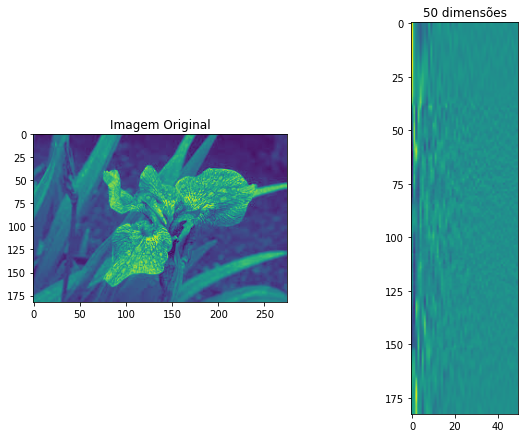

In [37]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121) 
plt.title("Imagem Original") 
plt.imshow(gray_setosa)
fig.add_subplot(122) 
plt.title("50 dimensões") 
plt.imshow(X_reduced_setosa)
plt.show()

In [38]:
class_feature_means = pd.DataFrame(columns=[3, 4, 5, 6, 7, 8])
for c, rows in dados.groupby('quality'):
    class_feature_means[c] = rows.mean()
class_feature_means = class_feature_means.drop(['quality'], axis=0)
class_feature_means

,3,4,5,6,7,8
fixed acidity,8.360000,7.779245,8.167254,8.347179,8.872362,8.566667
volatile acidity,0.884500,0.693962,0.577041,0.497484,0.403920,0.423333
citric acid,0.171000,0.174151,0.243686,0.273824,0.375176,0.391111
residual sugar,2.635000,2.694340,2.528855,2.477194,2.720603,2.577778
chlorides,0.122500,0.090679,0.092736,0.084956,0.076588,0.068444
free sulfur dioxide,11.000000,12.264151,16.983847,15.711599,14.045226,13.277778
total sulfur dioxide,24.900000,36.245283,56.513950,40.869906,35.020101,33.444444
density,0.997464,0.996542,0.997104,0.996615,0.996104,0.995212
pH,3.398000,3.381509,3.304949,3.318072,3.290754,3.267222
sulphates,0.570000,0.596415,0.620969,0.675329,0.741256,0.767778


In [39]:
md_dentro_classe = np.zeros((11,11))
for c, rows in dados.groupby('quality'):
    rows = rows.drop(['quality'], axis=1)
    s = np.zeros((11,11))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(11,1), class_feature_means[c].values.reshape(11,1)

        s += (x - mc).dot((x - mc).T)

    md_dentro_classe += s

In [40]:
feature_means = X_df.mean()
md_entre_classes = np.zeros((11,11))
for c in class_feature_means:    
    n = len(dados.loc[dados['quality'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(11,1), feature_means.values.reshape(11,1)
    
    md_entre_classes += n * (mc - m).dot((mc - m).T)

In [41]:
autovalores_lda, autovetores_lda = np.linalg.eig(np.linalg.inv(md_dentro_classe).dot(md_entre_classes))


In [42]:
pairs = [(np.abs(autovalores_lda[i]), autovetores_lda[:,i]) for i in range(len(autovalores_lda))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

0.6318983806659226
0.07644038712341963
0.024797465211399028
0.0064282776460010595
0.00417995914504542
6.520069458538265e-17
4.887362241479061e-17
3.5308645558650196e-17
3.5308645558650196e-17
1.0668991395750365e-17
1.0668991395750365e-17


In [43]:
total_lda = sum(autovalores_lda)
print('Variância explicada')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/total_lda).real))

Variância explicada
Eigenvector 0: 0.8496175855167345
Eigenvector 1: 0.10277775530192408
Eigenvector 2: 0.03334137760828139
Eigenvector 3: 0.008643126647786253
Eigenvector 4: 0.005620154925273736
Eigenvector 5: 8.766545128548742e-17
Eigenvector 6: 6.571292211217764e-17
Eigenvector 7: 4.74741621521366e-17
Eigenvector 8: 4.74741621521366e-17
Eigenvector 9: 1.4344969043920638e-17
Eigenvector 10: 1.4344969043920638e-17


In [44]:
#Aplicando o LDA manual

w_matrix = np.hstack((pairs[0][1].reshape(11,1), pairs[1][1].reshape(11,1))).real
X_lda = np.array(X_df.dot(w_matrix))

In [45]:
#Projetando com o LDA manual
df_lda = pd.DataFrame(X_lda, columns=['PC 1', 'PC 2'])
df_lda['quality'] = dados['quality']

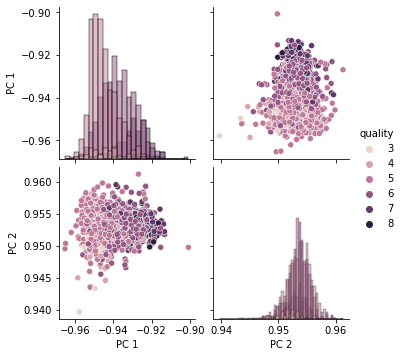

In [46]:
sns.pairplot(
    df_lda, vars=['PC 1', 'PC 2'], hue='quality', diag_kind="hist"
)
plt.show()

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_lib = lda.fit_transform(X_df, dados['quality'])

In [48]:
lda.explained_variance_ratio_

array([0.84961759, 0.10277776])

In [49]:
#Projetando com o LDA da biblioteca
df_lda_lib = pd.DataFrame(X_lda_lib, columns=['PC 1', 'PC 2'])
df_lda_lib['quality'] = dados['quality']

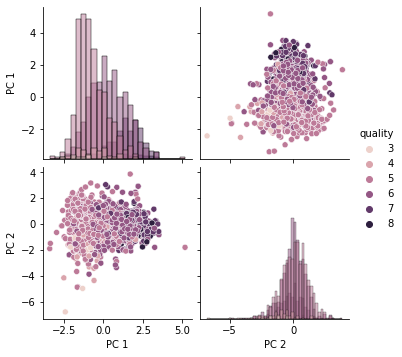

In [50]:
sns.pairplot(
    df_lda_lib, vars=['PC 1', 'PC 2'], hue='quality', diag_kind="hist"
)
plt.show()

In [51]:
#Step-4
sorted_index = np.argsort(eigen_values)[::-1]
sorted_autovalores_lda = eigen_values[sorted_index]
sorted_autovetores_lda = eigen_vectors[:,sorted_index]

NameError: name 'eigen_values' is not defined